# Pharmacy Department - Forecast Analysis

This is the final for the visualization on Power BI

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

In [21]:
df = pd.read_csv('../../Data/Pharmacy Dept/Data Cleaning/Merged_Pharmacy_Dept_CLEANED.csv')

C:\Users\sherm\AppData\Local\Temp\ipykernel_17384\1933215193.py:1: DtypeWarning: Columns (2,3,5,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/Pharmacy Dept/Data Cleaning/Merged_Pharmacy_Dept_CLEANED.csv')


In [22]:
df

,Date,Ward,Room,Case Number,DateTime TTO Received,DateTime (Meds Sent Down),DateTime TTO Checked,DateTime (Counselled),Remarks,Checked By (Pharmacist),...,DateTime (in Pigeon),DateTime (Dispensed by Nurses),DateTime (Passed to Nurse),Time Taken (Nurse to Dispense),Bed no.,Comments (for delayed cases) (eg. Pt sleeping etc),Time Taken To Pack (mins),Time Taken to Reach Pt (mins),Time Taken to Pack,Process Time Issue
0,2021-01-04,4A,4811.0,3021000132.0,2021-01-04 09:52:00,NaN,2021-01-04 10:00:00,2021-01-04 10:10:00,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,2021-01-04,3A,3828.0,3020041950.0,2021-01-04 08:34:00,NaN,2021-01-04 08:44:00,NaN,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,2021-01-04,3B,3606.0,3021000166.0,2021-01-04 09:15:00,2021-01-04 09:40:00,2021-01-04 09:50:00,2021-01-04 09:55:00,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,2021-01-04,DAY,2011.0,3021000242.0,2021-01-04 10:09:00,NaN,2021-01-04 10:20:00,NaN,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,2021-01-04,4B,4610.0,3020044361.0,2021-01-04 08:37:00,NaN,2021-01-04 08:47:00,NaN,PATIENT FOR HOME ON WED,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33197,2021-12-31 00:00:00,8,NaN,4021107656,2021-12-31 13:00:00,NaN,2021-12-31 13:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,824,add on TTO,0:00,0:10,0.0,No
33198,2021-12-31 00:00:00,12,NaN,4021107518,2021-12-31 13:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1205,NaN,PBH,0:12,PBH,No
33199,2021-12-31 00:00:00,11,NaN,4021107644,2021-12-31 14:08:00,NaN,2021-12-31 14:17:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1131,NaN,0:09,0:26,9.0,Yes
33200,2021-12-31 00:00:00,6,NaN,4021108689,2021-12-31 13:59:00,NaN,2021-12-31 14:09:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,622,1431 pt in bathroom,0:10,0:42,10.0,Yes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33202 entries, 0 to 33201
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Date                                                33202 non-null  object 
 1   Ward                                                32599 non-null  object 
 2   Room                                                6046 non-null   object 
 3   Case Number                                         33202 non-null  object 
 4   DateTime TTO Received                               33169 non-null  object 
 5   DateTime (Meds Sent Down)                           318 non-null    object 
 6   DateTime TTO Checked                                29022 non-null  object 
 7   DateTime (Counselled)                               1383 non-null   object 
 8   Remarks                                             2992 non-null   object 


In [24]:
#change datetime data format 
df[['Date']] = df[['Date']].apply(pd.to_datetime)

## Forecasting with SARIMA for TTO Received

In [25]:
daily_no_tto_df = df.groupby(['Date']).size().reset_index(name='TTO Count')
#daily_no_tto_df = df.groupby(['Date', 'Hospital']).size().reset_index(name='TTO Count')
daily_no_tto_df

,Date,TTO Count
0,2021-01-01,42
1,2021-01-02,49
2,2021-01-03,34
3,2021-01-04,69
4,2021-01-05,14
...,...,...
380,2022-01-22,60
381,2022-01-23,76
382,2022-01-24,72
383,2022-01-25,74


In [26]:
#Check info
daily_no_tto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       385 non-null    datetime64[ns]
 1   TTO Count  385 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB


In [27]:
#test to fix SARIMA
daily_no_tto_df = daily_no_tto_df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [28]:
#Change 'Date' column to datetime
daily_no_tto_df['Date'] = pd.to_datetime(daily_no_tto_df['Date'], infer_datetime_format=True)
#Set as index
daily_no_tto_df = daily_no_tto_df.set_index('Date')

daily_no_tto_df

,TTO Count
Date,
2021-01-01,42
2021-01-02,49
2021-01-03,34
2021-01-04,69
2021-01-05,14
...,...
2022-01-22,60
2022-01-23,76
2022-01-24,72


In [29]:
# exclude jan 2022 data since it is from MEH only 
daily_no_tto_df = daily_no_tto_df['2021-01-01':'2021-12-31'].resample('W').sum()
daily_no_tto_df.head()

,TTO Count
Date,
2021-01-03,125
2021-01-10,170
2021-01-17,298
2021-01-24,368
2021-01-31,373


### Create Training & Testing Datasets

Training and Testing Datasets need to change the range for future analysis purposes and to ensure it's accuracy.

In [30]:
y = daily_no_tto_df['TTO Count']

#set y_to_train, y_to_test, and the length of predict units
y_to_train = y[:'2021-06-30'] #dataset to train
y_to_test = y['2021-07-01':] #last X months for test

predict_date = len(y) - len(y[:'2021-06-30']) # the number of data points for the test set

### SARIMA Parameters Check

Whenever there's new data, there is a need to re-run this to get the best suitable parameters for the forecast.

In [31]:
#sarima parameters check
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

sarima_grid_search(y,12)

C:\Users\sherm\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sherm\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sherm\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sherm\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

The set of parameters with the minimum AIC is: SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:369.3802793561507


C:\Users\sherm\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### SARIMA One-Step ahead & Dynamic forecast

This is to check if SARIMA is suitable for your dataset, as well as to analyze train & test results based on current dataset.

In [32]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Calls Offered')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Calls Offered')

    plt.legend()
    plt.show()
    
    return (results)

Based on previous results, 

The set of parameters with the minimum AIC is: SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:369.3802793561507

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0634      0.274      0.232      0.817      -0.473       0.600
ar.S.L12      -0.8393      0.178     -4.717      0.000      -1.188      -0.491
sigma2      4.097e+04   1.44e+04      2.851      0.004    1.28e+04    6.91e+04


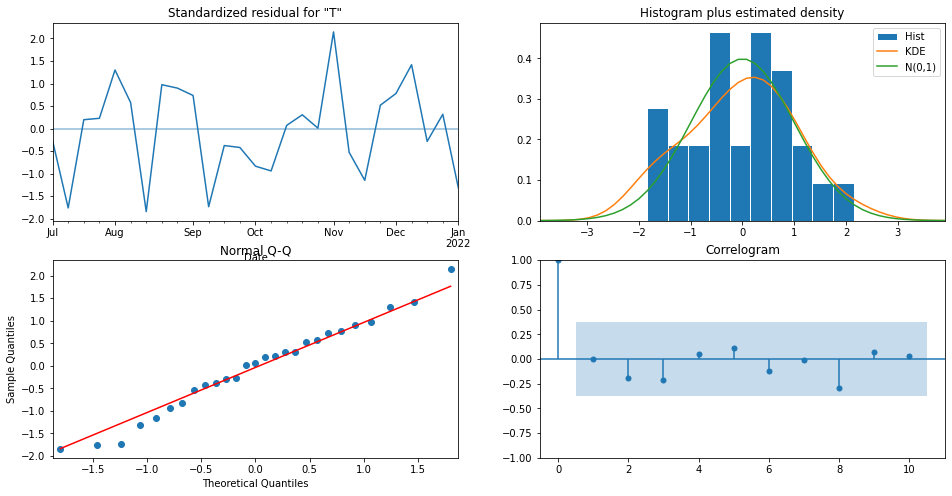

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 202.42


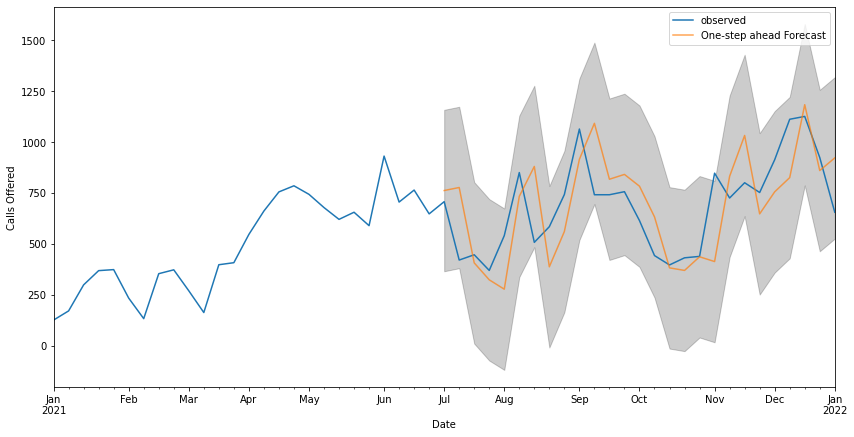

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 395.3


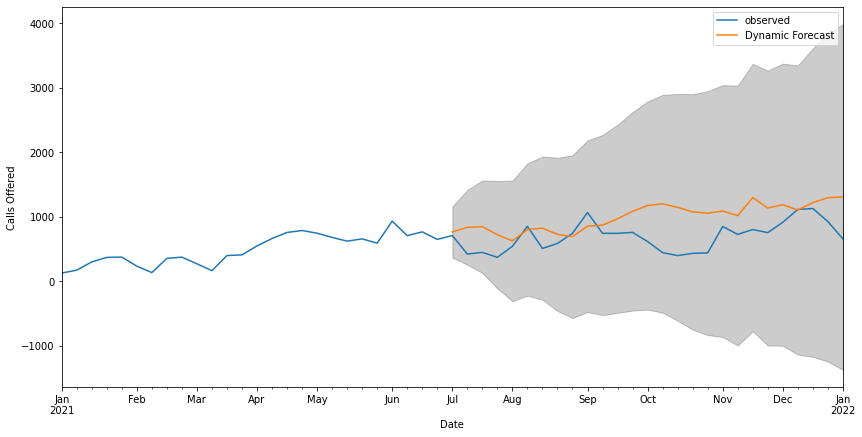

In [33]:
model = sarima_eva(y,(1,1,0),(1,1,0,12),12,'2021-07-04',y_to_test)

### Making Predictions

In [34]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

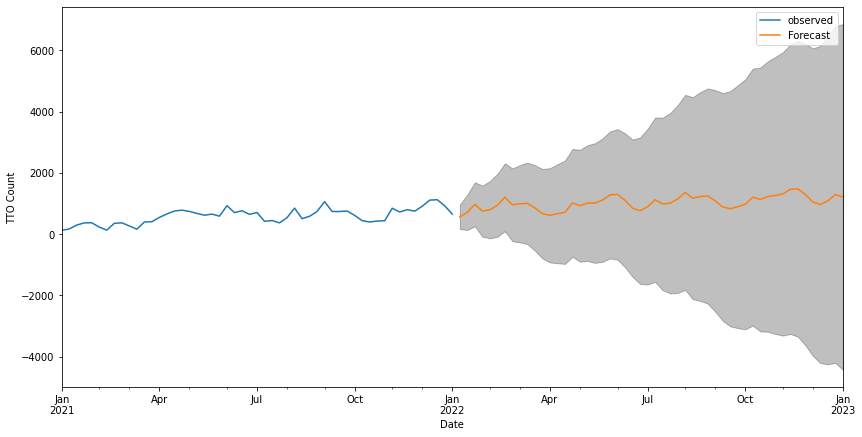

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-01-09,566.285154,169.556116,963.014193
1,2022-01-16,714.369859,135.239311,1293.500407
2,2022-01-23,975.608734,258.154639,1693.062829
3,2022-01-30,753.455393,-79.715885,1586.626671
4,2022-02-06,798.474626,-136.198485,1733.147737


In [35]:
final_table = forecast(model,52,y)
final_table.head()

## Coding for PowerBI

For copy/paste and transfer over to Power BI purposes.

Before transferring the code to Power BI, export daily_no_tto_df into a csv (index=True)

In [36]:
daily_no_tto_df.to_csv('../../Data/Pharmacy Dept/TTO_Groupby_Week_for_Forecast.csv', index=True)

In [37]:
#export predicted values into csv --> to view the exact values on PowerBI
final_table.to_csv('../../Data/Pharmacy Dept/TTO_Predicted_Values_for_2022.csv', index=True)

Afterwhich, import the following csv above into Power BI to build a Python Visual. 

Copy/Paste the following into Power BI Python Query Editor after creating the above. 

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm

dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
dataset = dataset.set_index('Date')

y = dataset['TTO Count']
y_to_train = y[:'2021-06-30']
y_to_test = y['2021-07-01':]
predict_date = len(y) - len(y[:'2021-06-30'])
               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    
    return (results)

def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(20, 12))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

#These values will change depending on the dataset
model = sarima_eva(y,(1,1,0),(1,1,0,12),12,'2021-07-04',y_to_test)
final_table = forecast(model,52,y)
```